# Different waveforms, different sounds

Today we'll learn how to create sounds that represent the same note, but that *sounds* differently

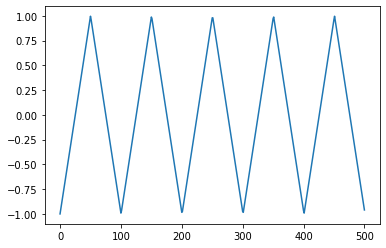

In [19]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

fs = 44100

def create_sound(frequency, seconds, kind = "sinusoid"):
    """This will create a sinusoid lasting 'seconds' with the given frequency.
    A frequency of 440 is the A3 note."""
    # Generate array with seconds*sample_rate steps, ranging between 0 and seconds
    t = np.linspace(0, seconds, int(seconds * fs), False)

    if kind == "sinusoid":
        # Generate a 440 Hz sine wave
        note = np.sin(frequency * t * 2 * np.pi)
    elif kind == "square":
        note = signal.square(2 * np.pi * frequency * t)
    elif kind == "triangle":
        note = signal.sawtooth(2 * np.pi * frequency * t, width=0.5)
    else:
        raise Exception("Invalid sound kind %s, existing are sinusoid, square, triangle" % kind)
    
    return note

def plot_sound(input_sound):
    plt.plot(input_sound)

# Here we create a short sound, the A note    
sound = create_sound(440, 5 / 440.0, kind="triangle")
# We display it
plot_sound(sound)

Now let's play it, using a new function, play_sound

In [24]:
import simpleaudio as sa
import random
fs = 44100

def play_sound(input_sound):    
    # Ensure that highest value is in 16-bit range
    audio = input_sound * (2**15 - 1) / np.max(np.abs(input_sound))
    # Convert to 16-bit data
    audio = audio.astype(np.int16)

    # Start playback
    play_obj = sa.play_buffer(audio, 1, 2, fs)

    # Wait for playback to finish before exiting
    play_obj.wait_done()
    

# Here we create a longer sound (1 second), the A note    
for kind in ["sinusoid", "triangle", "square"]:
    sound = create_sound(440, 1, kind=kind)
    play_sound(sound)
